In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import cv2

In [7]:

dataset_path = 'F:\Data Science\Computer Vision loyixa\Svetafor rangini aniqlovchi model\With_Deep_learning\dataset'

In [8]:
# Set up the ImageDataGenerator for image preprocessing
data_gen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
    rotation_range=20,  # Randomly rotate images within this range
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in any missing pixels after transformations
)

# Create training and validation generators
train_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize images to this size
    batch_size=32,
    class_mode='categorical',  # Use categorical labels
    subset='training'  # Use this subset for training
)

validation_generator = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use this subset for validation
)

Found 81 images belonging to 3 classes.
Found 19 images belonging to 3 classes.


In [9]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 classes: Red, Green, Yellow
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=20)

# Save the trained model
model.save('traffic_light_model_advanced.h5')


c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.2016 - loss: 1.3942 - val_accuracy: 0.3684 - val_loss: 1.1147
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2346 - loss: 1.1096 - val_accuracy: 0.5263 - val_loss: 1.0631
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4361 - loss: 1.0880 - val_accuracy: 0.5263 - val_loss: 1.0196
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4891 - loss: 1.0111 - val_accuracy: 0.5263 - val_loss: 0.8849
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5629 - loss: 0.9642 - val_accuracy: 0.6842 - val_loss: 0.8679
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5177 - loss: 0.9915 - val_accuracy: 0.7368 - val_loss: 0.7474
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6067 - loss: 0.8472 - val_accuracy: 0.6316 - val_loss: 0.7319
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5815 - loss: 0.9168 - val_accuracy: 0.6842 - val_loss: 0.6968
Epoch 9/20
3/3 ━━━━━━━━━━━

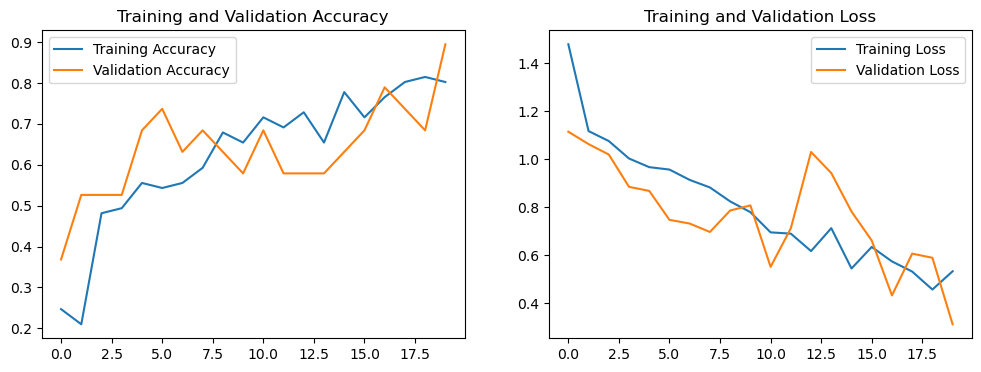

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


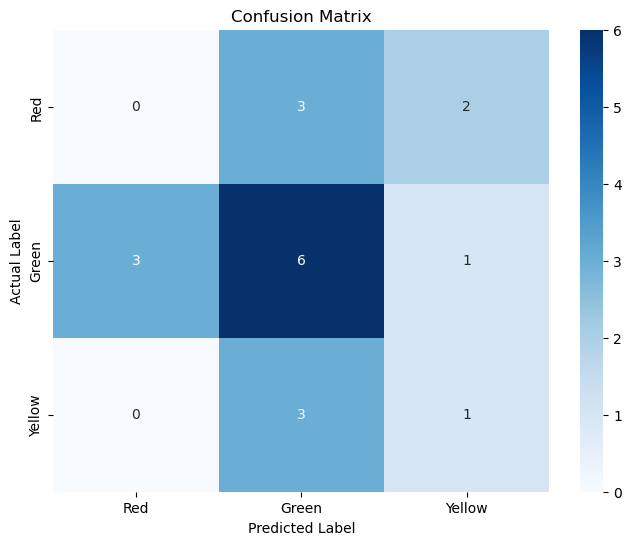

Classification Report
              precision    recall  f1-score   support

         Red       0.00      0.00      0.00         5
       Green       0.50      0.60      0.55        10
      Yellow       0.25      0.25      0.25         4

    accuracy                           0.37        19
   macro avg       0.25      0.28      0.27        19
weighted avg       0.32      0.37      0.34        19



In [10]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate the model using confusion matrix and classification report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Red", "Green", "Yellow"], yticklabels=["Red", "Green", "Yellow"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print('Classification Report')
target_names = ["Red", "Green", "Yellow"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


In [11]:
# Load the trained model for real-time testing
model = tf.keras.models.load_model('traffic_light_model_advanced.h5')

# Function to preprocess images for prediction
def preprocess_image(img):
    img = cv2.resize(img, (128, 128))  # Resize image to model input size
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Open the webcam for real-time traffic light detection
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame for prediction
    preprocessed_img = preprocess_image(frame)

    # Make prediction
    prediction = model.predict(preprocessed_img)
    class_idx = np.argmax(prediction)
    color = ["Red", "Green", "Yellow"][class_idx]

    # Display the predicted color on the frame
    cv2.putText(frame, f'Traffic Light Color: {color}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Show the frame
    cv2.imshow('Traffic Light Detection', frame)

    # Exit loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()